### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# Checking for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)

# Displaying columns with missing values for further action
missing_values[missing_values > 0]

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# Dropping the 'car' column only if it exists
if 'car' in data.columns:
    data.drop(columns=['car'], inplace=True)

# Filling missing values in categorical columns with the mode (most frequent value)
categorical_columns = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
for column in categorical_columns:
    if column in data.columns:  # Ensure the column exists before filling
        data[column].fillna(data[column].mode()[0], inplace=True)

# Verifying if all missing values have been handled
missing_values_after = data.isnull().sum().sum()
print(f"Total missing values after cleaning: {missing_values_after}")


Total missing values after cleaning: 0


C:\Users\benji\AppData\Local\Temp\ipykernel_64260\4270278357.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


4. What proportion of the total observations chose to accept the coupon?



In [12]:
# Calculating the proportion of observations that accepted the coupon
acceptance_rate = data['Y'].mean()
print(f"The proportion of observations that accepted the coupon is: {acceptance_rate:.4f} or {acceptance_rate * 100:.2f}%")


The proportion of observations that accepted the coupon is: 0.5684 or 56.84%


5. Use a bar plot to visualize the `coupon` column.

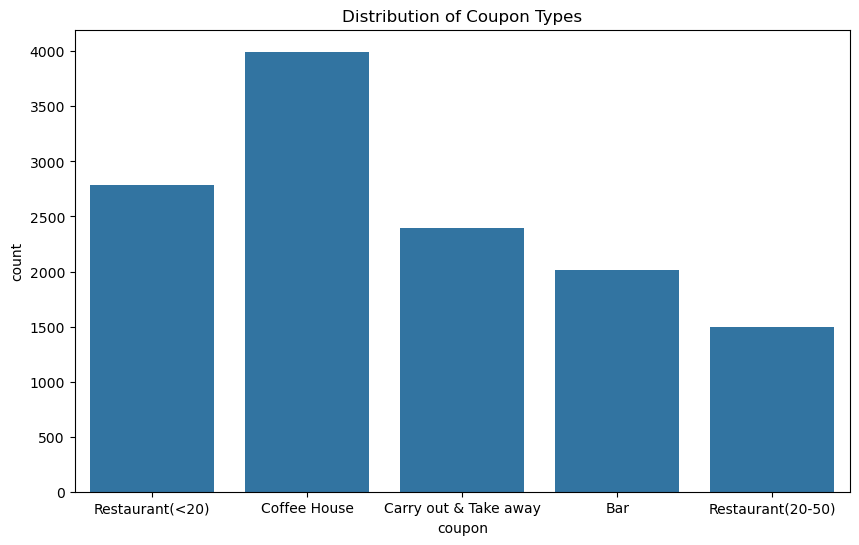

In [13]:
# Visualizing the distribution of the 'Y' column (coupon acceptance)
# Bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon')
plt.title("Distribution of Coupon Types")
plt.show()


6. Use a histogram to visualize the temperature column.

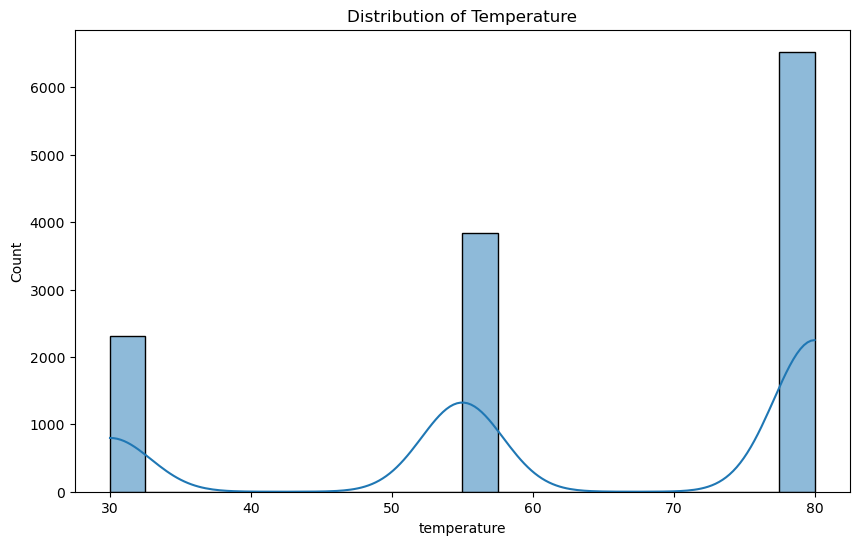

In [14]:
# Histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', bins=20, kde=True)
plt.title("Distribution of Temperature")
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
# Creating a DataFrame that contains only bar-related coupons
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [18]:
# Calculating the proportion of accepted bar coupons
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"The proportion of bar coupons accepted is: {bar_acceptance_rate:.4f} or {bar_acceptance_rate * 100:.2f}%")


The proportion of bar coupons accepted is: 0.4100 or 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
# Separating users by bar visit frequency (3 or fewer vs more than 3)
bar_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculating acceptance rates
rate_3_or_fewer = bar_3_or_fewer['Y'].mean()
rate_more_than_3 = bar_more_than_3['Y'].mean()

print(f"Acceptance rate for those who go to a bar 3 or fewer times a month: {rate_3_or_fewer:.4f} or {rate_3_or_fewer * 100:.2f}%")
print(f"Acceptance rate for those who go to a bar more than 3 times a month: {rate_more_than_3:.4f} or {rate_more_than_3 * 100:.2f}%")


Acceptance rate for those who go to a bar 3 or fewer times a month: 0.3707 or 37.07%
Acceptance rate for those who go to a bar more than 3 times a month: 0.7688 or 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:

bar_coupons = data[data['coupon'] == 'Bar'].copy()

# Converting the 'age' column to numeric using .loc for safe modification
bar_coupons.loc[:, 'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# Filtering for drivers who go to a bar more than once a month and are over 25
bar_drivers_25_plus = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'] > 25)]

# Filtering for all other drivers
bar_others = bar_coupons[~bar_coupons.index.isin(bar_drivers_25_plus.index)]

# Calculating acceptance rates
rate_25_plus = bar_drivers_25_plus['Y'].mean()
rate_others = bar_others['Y'].mean()

print(f"Acceptance rate for drivers over 25 who go to a bar more than once a month: {rate_25_plus:.4f}")
print(f"Acceptance rate for all other drivers: {rate_others:.4f}")


Acceptance rate for drivers over 25 who go to a bar more than once a month: 0.6997
Acceptance rate for all other drivers: 0.3486


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [27]:
# Filtering for drivers who go to bars more than once a month with specified conditions
bar_special_drivers = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (~bar_coupons['occupation'].isin(['Farming/Fishing', 'Forestry']))
]

# Calculating acceptance rates
special_drivers_rate = bar_special_drivers['Y'].mean()
print(f"Acceptance rate for special drivers: {special_drivers_rate:.4f} or {special_drivers_rate * 100:.2f}%")


Acceptance rate for special drivers: 0.7132 or 71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [32]:
# Condition 1: Drivers who go to bars more than once a month, no kids, and not widowed
condition_1 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
]

# Condition 2: Drivers who go to bars more than once a month and are under 30
condition_2 = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons['age'] < 30)
]

# Condition 3: Drivers who go to cheap restaurants more than 4 times a month with income less than $50,000
condition_3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (
        (data['income'].str.contains('Less than', case=False, na=False)) |
        (data['income'].str.contains('12500 - $24999', case=False, na=False)) |
        (data['income'].str.contains('25000 - $37499', case=False, na=False)) |
        (data['income'].str.contains('37500 - $49999', case=False, na=False))
    )
]

# Calculating acceptance rates for each condition
rate_1 = condition_1['Y'].mean()
rate_2 = condition_2['Y'].mean()
rate_3 = condition_3['Y'].mean()

# Displaying the acceptance rates for each condition
print(f"Acceptance rate for condition 1: {rate_1:.4f} or {rate_1 * 100:.2f}%")
print(f"Acceptance rate for condition 2: {rate_2:.4f} or {rate_2 * 100:.2f}%")
print(f"Acceptance rate for condition 3: {rate_3:.4f} or {rate_3 * 100:.2f}%")


Acceptance rate for condition 1: 0.7132 or 71.32%
Acceptance rate for condition 2: 0.7313 or 73.13%
Acceptance rate for condition 3: 0.6275 or 62.75%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#We can hypothesize that drivers who frequently go to bars and are accompanied by other adults (friends, partners) are more likely to accept bar coupons; this is likely due to social elements influencing their decision-making.
# We can also hypothesize that drivers who frequently go to cheap restaurants and have a lower income are more likely to accept bar coupons; this is likely due to financial constraints influencing their decision-making.
# For bar coupons, income does not seem to be a significant factor in acceptance rates, as the acceptance rate is similar across different income groups. However, for cheap restaurant coupons, income does seem to play a role, as those with lower incomes are more likely to accept the coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [35]:
# Creating a DataFrame that contains only Coffee House-related coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']
coffee_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [36]:
# Calculating the proportion of accepted coffee house coupons
coffee_acceptance_rate = coffee_coupons['Y'].mean()
print(f"The proportion of Coffee House coupons accepted is: {coffee_acceptance_rate:.4f} or {coffee_acceptance_rate * 100:.2f}%")


The proportion of Coffee House coupons accepted is: 0.4992 or 49.92%


In [37]:
# Analyzing acceptance rates by passenger type
coffee_passenger_rates = coffee_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(coffee_passenger_rates)


passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64


In [39]:
coffee_coupons = data[data['coupon'] == 'Coffee House'].copy()

# Converting 'age' to numeric for proper analysis
coffee_coupons.loc[:, 'age'] = pd.to_numeric(coffee_coupons['age'], errors='coerce')

# Defining age groups using pd.cut with clean .loc assignment
coffee_coupons.loc[:, 'age_group'] = pd.cut(
    coffee_coupons['age'], 
    bins=[0, 25, 40, 100], 
    labels=['Under 25', '25-40', 'Over 40'],
    right=False  
)

# Analyzing acceptance rates by age group
coffee_age_rates = coffee_coupons.groupby('age_group')['Y'].mean().sort_values(ascending=False)
print(coffee_age_rates)

age_group
Over 40     0.558935
Under 25    0.522267
25-40       0.490244
Name: Y, dtype: float64


C:\Users\benji\AppData\Local\Temp\ipykernel_64260\3501568533.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_age_rates = coffee_coupons.groupby('age_group')['Y'].mean().sort_values(ascending=False)


In [40]:
# Analyzing acceptance rates by income group
coffee_income_rates = coffee_coupons.groupby('income')['Y'].mean().sort_values(ascending=False)
print(coffee_income_rates)


income
$87500 - $99999     0.557196
Less than $12500    0.551948
$37500 - $49999     0.542373
$12500 - $24999     0.540404
$50000 - $62499     0.503650
$100000 or More     0.494382
$25000 - $37499     0.473438
$62500 - $74999     0.436364
$75000 - $87499     0.296610
Name: Y, dtype: float64


In [ ]:
#Passengers who are friends or partners are more likely to accept coffee house coupons.
#Income may play a more significant role for coffee house coupons compared to bar coupons